<a href="https://colab.research.google.com/github/Sairaj-97/Deep-Learning/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#two techniques of getting embedded vectors for words


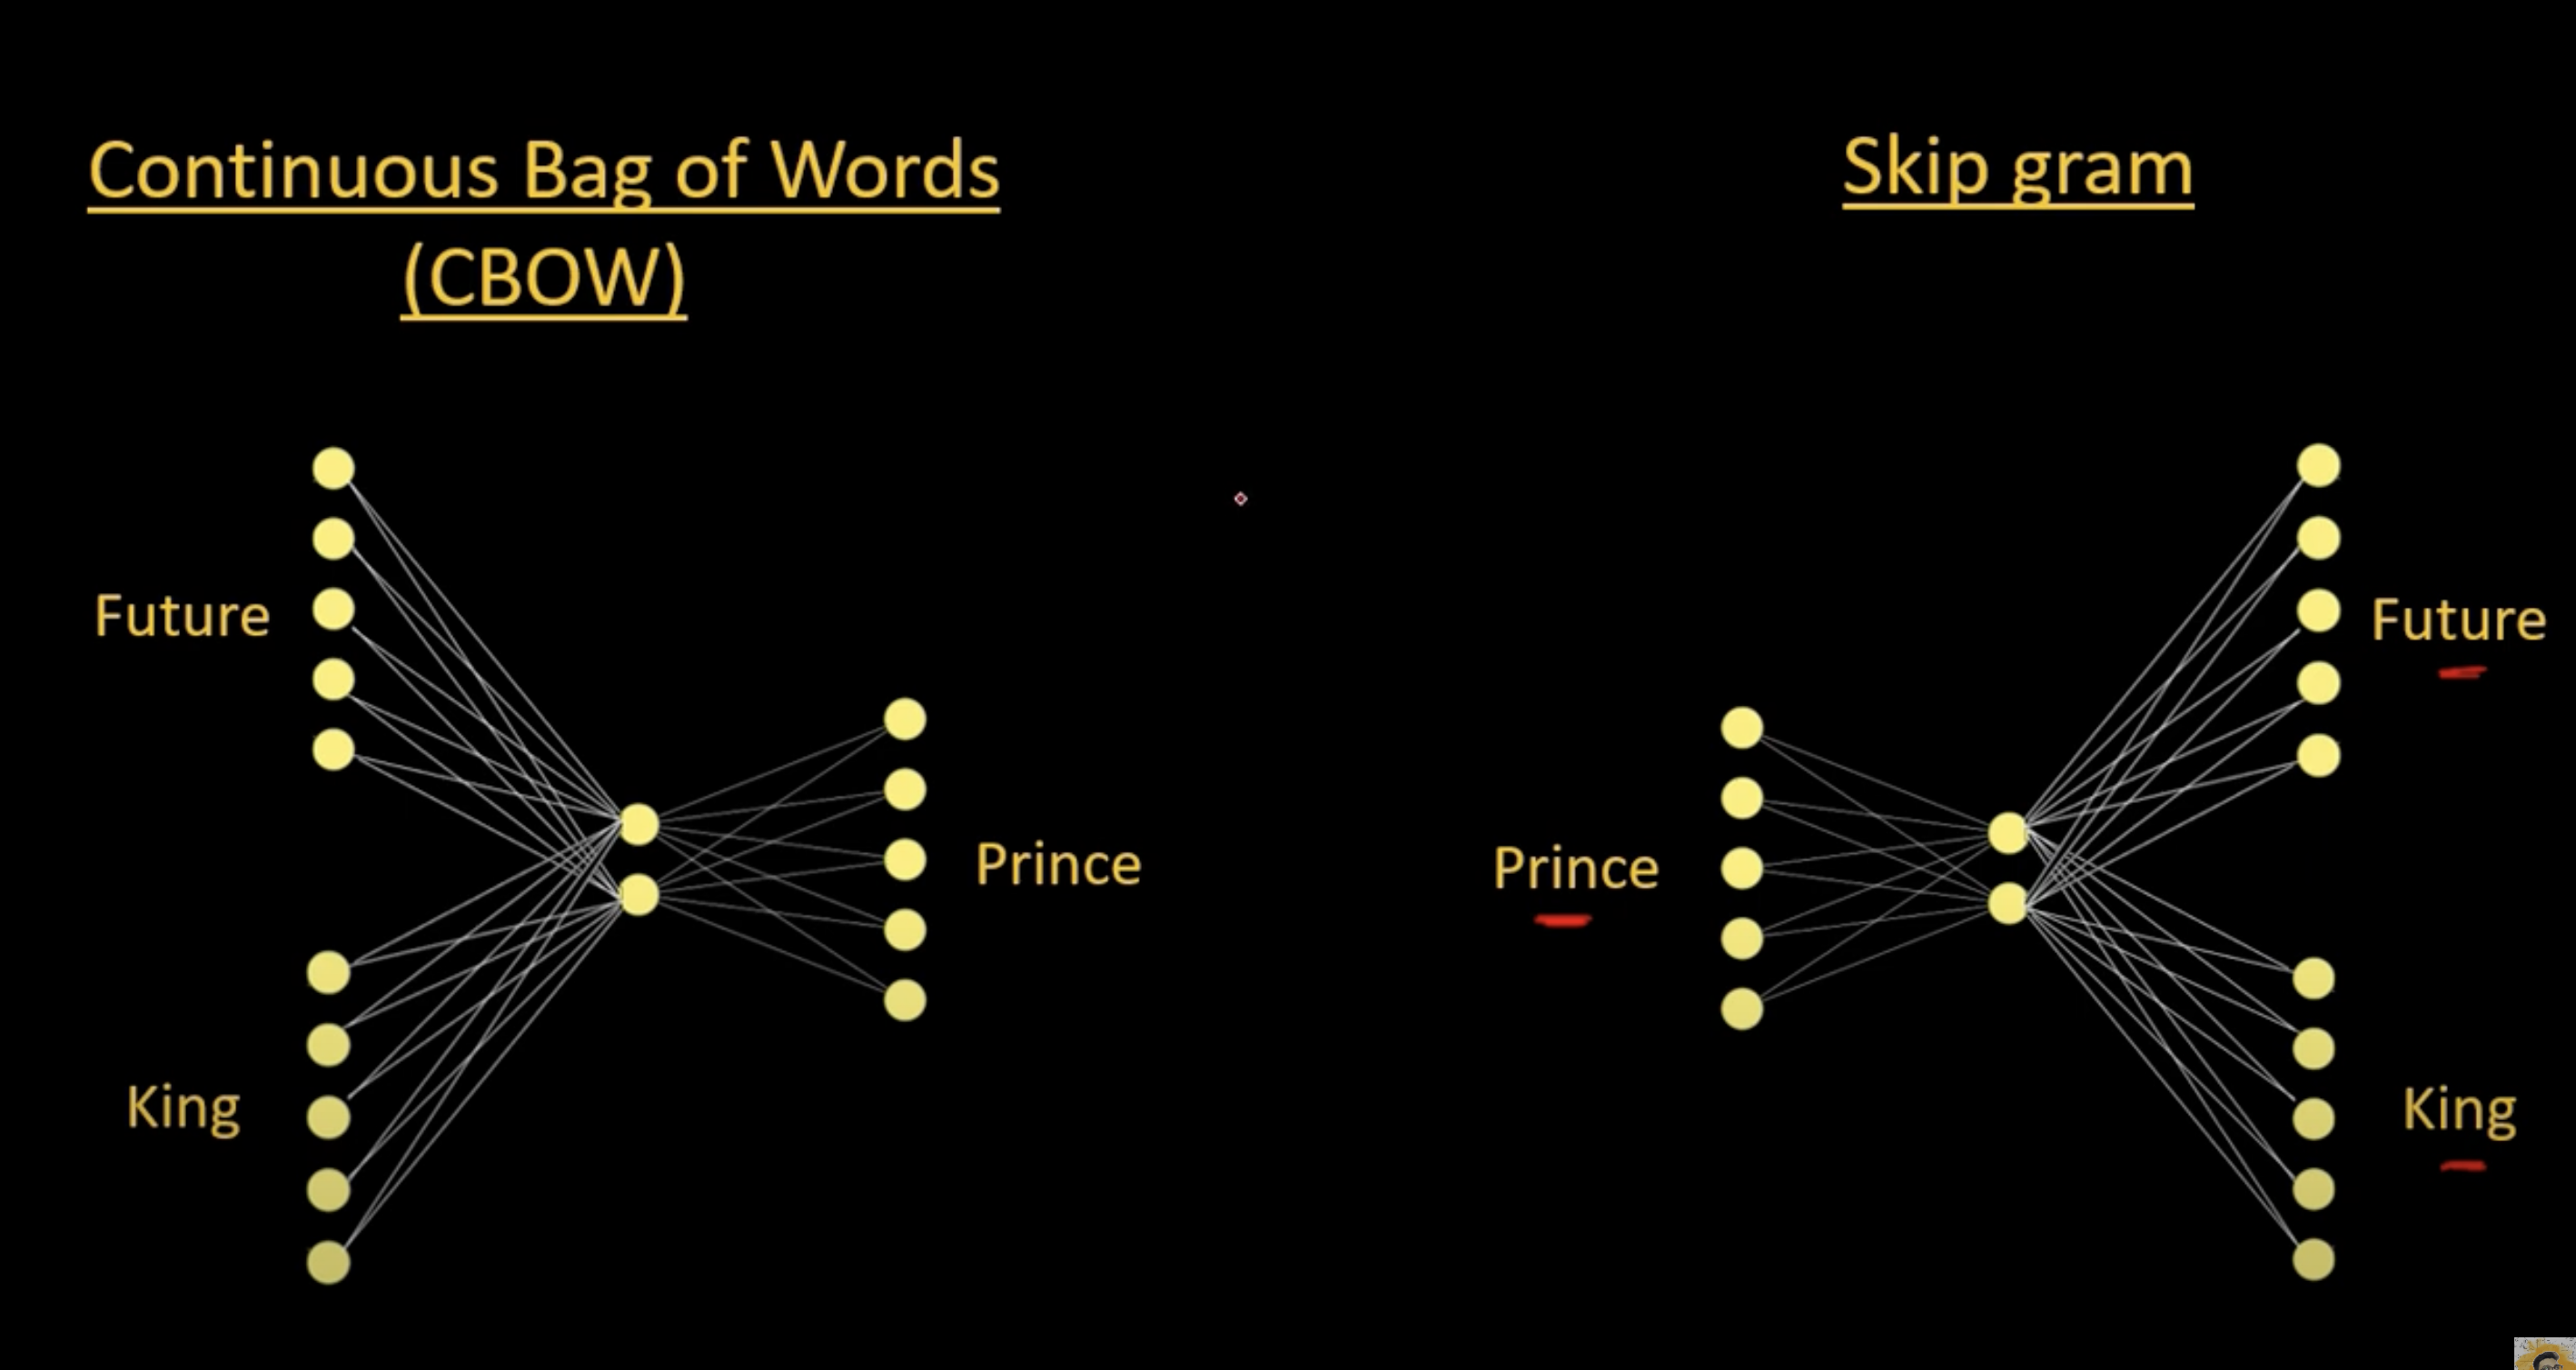

Reading and Exploring the Dataset
The dataset we are using here is a subset of Amazon reviews from the Cell Phones & Accessories category. The data is stored as a JSON file and can be read using pandas.

Link to the Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

In [3]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds

In [4]:
reviews,info=tfds.load("imdb_reviews", split="train", as_supervised=True,with_info=True)

In [ ]:
info

In [6]:
review_str=[]
for text,lbl in reviews:
    txt = text.numpy().decode('utf-8')  # ✅ text is a Tensor
    review_str.append(txt)

In [7]:
review_str[:3]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [8]:
!pip install gensim

In [11]:
import gensim as gs
from gensim.utils import simple_preprocess

In [12]:
preprocessed_reviews = [simple_preprocess(text) for text in review_str]

In [ ]:
preprocessed_reviews[:2]

In [14]:
model=gs.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)

In [17]:
model.build_vocab(preprocessed_reviews)

In [18]:
model.corpus_count

25000

In [19]:
model.train(preprocessed_reviews,total_examples=model.corpus_count,epochs=model.epochs)

(21443622, 28265970)

In [20]:
model.wv.most_similar("bad")

[('terrible', 0.7471775412559509),
 ('awful', 0.7272006869316101),
 ('horrible', 0.7238153219223022),
 ('good', 0.6835893392562866),
 ('lame', 0.6553253531455994),
 ('stupid', 0.6332197785377502),
 ('cheesy', 0.6134753227233887),
 ('poor', 0.6117883324623108),
 ('lousy', 0.5845056772232056),
 ('ok', 0.5772400498390198)]

In [25]:
model.wv.similarity("good","great")

0.7084423